<a href="https://colab.research.google.com/github/Jieunlee-svg/dataanalysis_/blob/main/%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EA%B2%B0%EA%B3%BC_%EB%B6%84%EC%84%9D_%EA%B7%B8%EB%A3%B9%ED%98%95_%EA%B0%80%EB%A1%9C_%EB%A7%89%EB%8C%80%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 엑셀 불러오기
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving poll_answer2.xlsx to poll_answer2 (7).xlsx


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
response_order = ['적극적으로 사용하고 싶다.', '상황에 따라 다르다.', '사용하고 싶지 않다.']

df['Q9(TEXT)'] = df['Q9(TEXT)'].astype(str).str.strip()
df['Q18(TEXT)'] = df['Q18(TEXT)'].astype(str).str.strip()

df['Q9(TEXT)'] = pd.Categorical(df['Q9(TEXT)'], categories=response_order, ordered=True)
df['Q18(TEXT)'] = pd.Categorical(df['Q18(TEXT)'], categories=response_order, ordered=True)

q9_counts = df['Q9(TEXT)'].value_counts(sort=False).reindex(response_order)
q18_counts = df['Q18(TEXT)'].value_counts(sort=False).reindex(response_order)

# ✅ 비율 계산
q9_pct = q9_counts / q9_counts.sum() * 100
q18_pct = q18_counts / q18_counts.sum() * 100

In [67]:
df_plot = pd.DataFrame({
    '공유받는 사람': q9_pct,
    '공유하는 사람': q18_pct
})

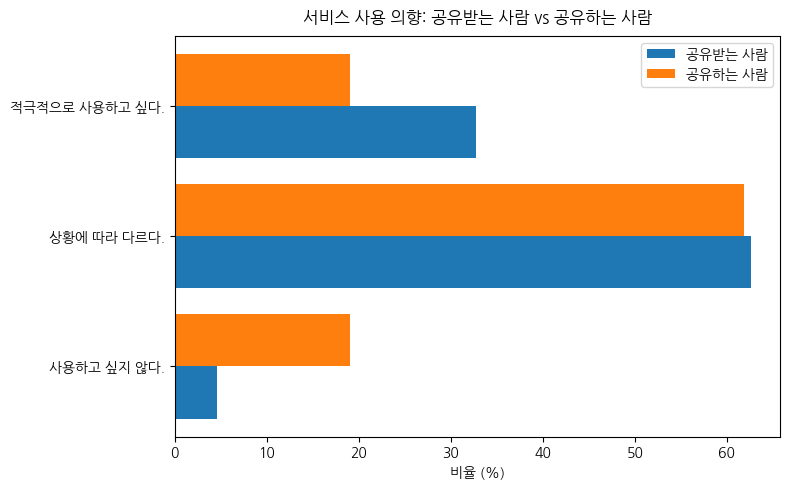

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))
y = range(len(response_order))

# 순서 반영
response_order_reversed = response_order[::-1]

# ✅ 비율 데이터를 그래프에 입력
ax.barh(y, df_plot.loc[response_order_reversed, '공유받는 사람'], height=0.4, label='공유받는 사람', color='#1f77b4')
ax.barh([i + 0.4 for i in y], df_plot.loc[response_order_reversed, '공유하는 사람'], height=0.4, label='공유하는 사람', color='#ff7f0e')

# y축 라벨
ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(response_order_reversed)

plt.xlabel('비율 (%)')
plt.title('서비스 사용 의향: 공유받는 사람 vs 공유하는 사람', loc='center', pad=10)
plt.legend()
plt.tight_layout()
plt.show()

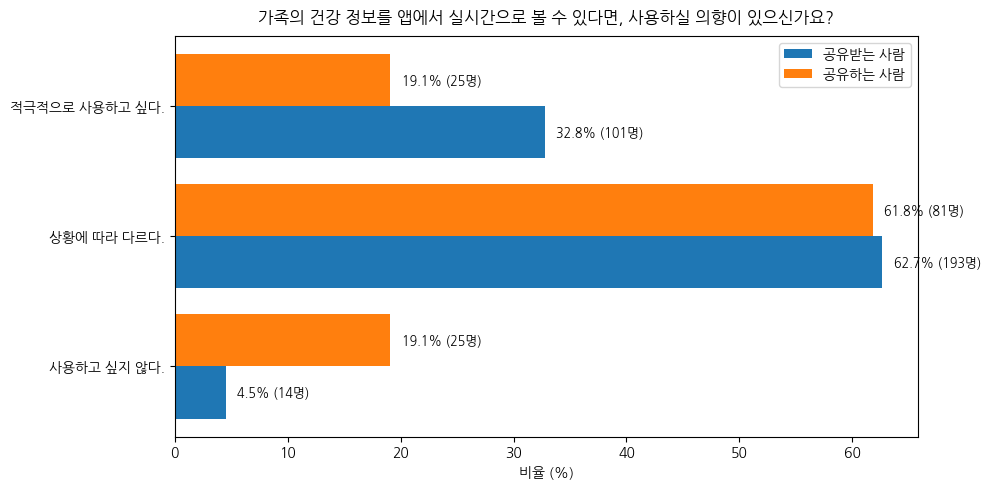

In [71]:
fig, ax = plt.subplots(figsize=(10, 5))
y = range(len(response_order))
response_order_reversed = response_order[::-1]

# ✅ 비율과 빈도 데이터 준비
for i, resp in enumerate(response_order_reversed):
    # 공유받는 사람
    val1 = df_plot.loc[resp, '공유받는 사람']
    count1 = df[df['Q9(TEXT)'] == resp].shape[0]

    # 공유하는 사람
    val2 = df_plot.loc[resp, '공유하는 사람']
    count2 = df[df['Q18(TEXT)'] == resp].shape[0]

    # ✅ 막대 그리기
    ax.barh(i, val1, height=0.4, label='공유받는 사람' if i == 0 else "", color='#1f77b4')
    ax.barh(i + 0.4, val2, height=0.4, label='공유하는 사람' if i == 0 else "", color='#ff7f0e')

    # ✅ 텍스트 추가
    ax.text(val1 + 1, i, f"{val1:.1f}% ({count1}명)", va='center', ha='left', fontsize=9, color='black')
    ax.text(val2 + 1, i + 0.4, f"{val2:.1f}% ({count2}명)", va='center', ha='left', fontsize=9, color='black')

# ✅ y축 라벨
ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(response_order_reversed)

# ✅ 제목 및 기타 설정
plt.xlabel('비율 (%)')
plt.title('가족의 건강 정보를 앱에서 실시간으로 볼 수 있다면, 사용하실 의향이 있으신가요?', loc='center', pad=10)
plt.legend()
plt.tight_layout()
plt.show()

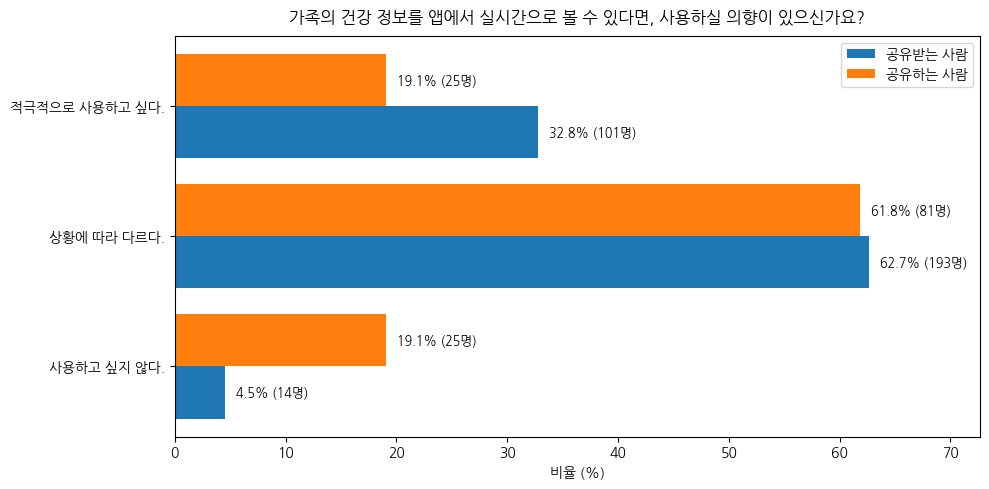

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))  # ✅ 가로 사이즈 늘리기
y = range(len(response_order))
response_order_reversed = response_order[::-1]

# ✅ 최대 비율 값 계산 (범위 설정용)
max_val = max(df_plot.max()) + 10  # +10% 여유

for i, resp in enumerate(response_order_reversed):
    # 공유받는 사람
    val1 = df_plot.loc[resp, '공유받는 사람']
    count1 = df[df['Q9(TEXT)'] == resp].shape[0]

    # 공유하는 사람
    val2 = df_plot.loc[resp, '공유하는 사람']
    count2 = df[df['Q18(TEXT)'] == resp].shape[0]

    # 막대 그래프
    ax.barh(i, val1, height=0.4, label='공유받는 사람' if i == 0 else "", color='#1f77b4')
    ax.barh(i + 0.4, val2, height=0.4, label='공유하는 사람' if i == 0 else "", color='#ff7f0e')

    # 텍스트
    ax.text(val1 + 1, i, f"{val1:.1f}% ({count1}명)", va='center', ha='left', fontsize=9)
    ax.text(val2 + 1, i + 0.4, f"{val2:.1f}% ({count2}명)", va='center', ha='left', fontsize=9)

# ✅ y축 설정
ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(response_order_reversed)

# ✅ x축 범위 여유 주기
ax.set_xlim(0, max_val)

# ✅ 타이틀 및 기타 설정
plt.xlabel('비율 (%)')
plt.title('가족의 건강 정보를 앱에서 실시간으로 볼 수 있다면, 사용하실 의향이 있으신가요?', loc='center', pad=10)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: '공유받는 사람'

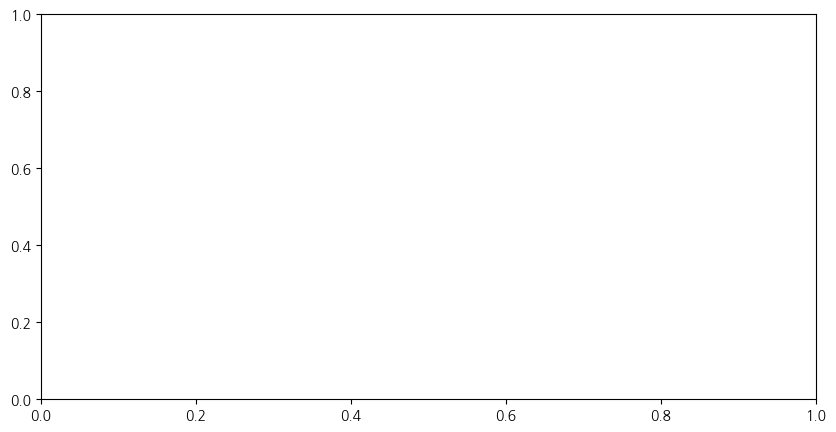

In [83]:
# 응답 수 계산
n_receiver = df['Q9(TEXT)'].notna().sum()
n_provider = df['Q18(TEXT)'].notna().sum()

fig, ax = plt.subplots(figsize=(10, 5))
y = range(len(response_order))
response_order_reversed = response_order[::-1]

# 최대값 설정
max_val = max(df_plot.max()) + 10

# 막대 그리기 및 값 라벨 표시
for i, resp in enumerate(response_order_reversed):
    val1 = df_plot.loc[resp, '공유받는 사람']
    val2 = df_plot.loc[resp, '공유하는 사람']
    count1 = df[df['Q9(TEXT)'] == resp].shape[0]
    count2 = df[df['Q18(TEXT)'] == resp].shape[0]

    ax.barh(i, val1, height=0.4, color='#1f77b4', label=f'공유받는 사람 ({n_receiver}명)' if i == 0 else "")
    ax.barh(i + 0.4, val2, height=0.4, color='#ff7f0e', label=f'공유하는 사람 ({n_provider}명)' if i == 0 else "")

    ax.text(val1 + 1, i, f"{val1:.1f}% ({count1}명)", va='center', ha='left', fontsize=9)
    ax.text(val2 + 1, i + 0.4, f"{val2:.1f}% ({count2}명)", va='center', ha='left', fontsize=9)

# y축 설정
ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(response_order_reversed)

# x축 여유
ax.set_xlim(0, max_val)

# 제목 및 라벨
plt.xlabel('비율 (%)')
plt.title('가족의 건강 정보를 앱에서 실시간으로 볼 수 있다면, 사용하실 의향이 있으신가요?', loc='center', pad=10)

# ✅ 범례 위치 및 표시
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

50대, 60대 필터링

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 1. 50대, 60대 필터링
df_50_60 = df[df['AGE_2'].isin(['50대', '60대'])]

# ✅ 2. 응답 순서 정의
response_order = ['적극적으로 사용하고 싶다.', '상황에 따라 다르다.', '사용하고 싶지 않다.']
cat_type = pd.CategoricalDtype(categories=response_order, ordered=True)

# ✅ 3. 공유받는 사람: Q9(TEXT)
receive_counts = df_50_60['Q9(TEXT)'].astype(cat_type).value_counts().sort_index()
receive_total = receive_counts.sum()
receive_ratio = (receive_counts / receive_total * 100).round(1)

# ✅ 4. 공유하는 사람: Q18(TEXT)
share_counts = df_50_60['Q18(TEXT)'].astype(cat_type).value_counts().sort_index()
share_total = share_counts.sum()
share_ratio = (share_counts / share_total * 100).round(1)

# ✅ 5. 시각화용 데이터프레임 생성
df_plot = pd.DataFrame({
    f'공유받는 사람 ({receive_total}명)': receive_ratio,
    f'공유하는 사람 ({share_total}명)': share_ratio
})

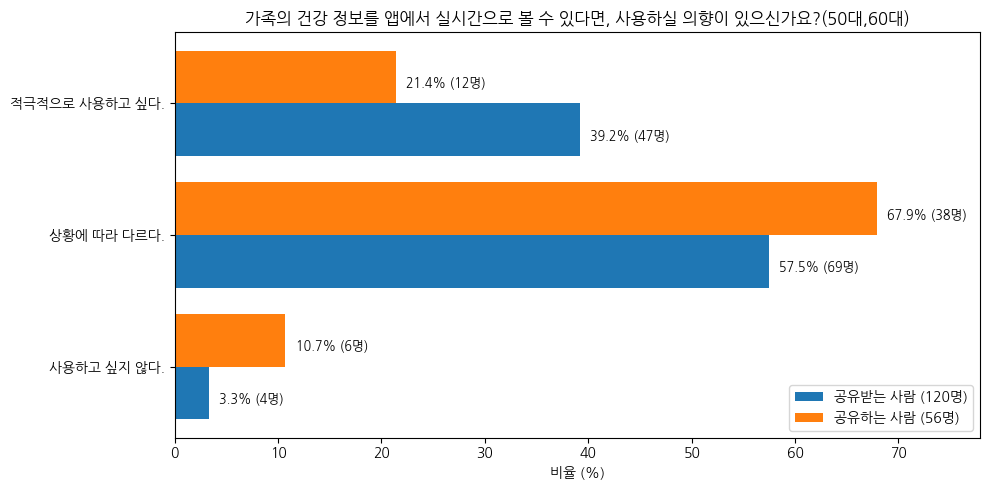

In [80]:
fig, ax = plt.subplots(figsize=(10, 5))
y = range(len(response_order))
response_order_reversed = response_order[::-1]

# 막대 그래프
ax.barh(y, df_plot.loc[response_order_reversed, df_plot.columns[0]], height=0.4,
        label=df_plot.columns[0], color='#1f77b4')
ax.barh([i + 0.4 for i in y], df_plot.loc[response_order_reversed, df_plot.columns[1]], height=0.4,
        label=df_plot.columns[1], color='#ff7f0e')

# 최대값 설정
max_val = max(df_plot.max()) + 10

# y축 설정
ax.set_yticks([i + 0.2 for i in y])
ax.set_yticklabels(response_order_reversed)

# x축 여유
ax.set_xlim(0, max_val)

# 수치 표시
for i in y:
    r_label = df_plot.columns[0]
    s_label = df_plot.columns[1]
    r_val = df_plot.loc[response_order_reversed[i], r_label]
    s_val = df_plot.loc[response_order_reversed[i], s_label]
    r_count = receive_counts[response_order_reversed[i]]
    s_count = share_counts[response_order_reversed[i]]

    ax.text(r_val + 1, i - 0.05, f'{r_val}% ({r_count}명)', va='center', fontsize=9)
    ax.text(s_val + 1, i + 0.35, f'{s_val}% ({s_count}명)', va='center', fontsize=9)

# 라벨 & 제목
plt.xlabel('비율 (%)')
plt.title('가족의 건강 정보를 앱에서 실시간으로 볼 수 있다면, 사용하실 의향이 있으신가요?(50대,60대)', loc='center')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()